### Imports and convenience methods

In [1]:
from RLMethods import *

def run(method, episodes, policy, gamma, filename, count_cards=False, count_method=None):
    states_usable_ace, states_no_usable_ace, policy_ace, policy_no_ace = method(episodes, policy, gamma,
                                                     count_cards=count_cards, count_method=count_method)

    policies = [policy_ace,
                policy_no_ace]

    titles = ['Usable Ace ' + str(episodes) + " episodes",
              'No Usable Ace ' + str(episodes) + " episodes"]

    _, axes = plt.subplots(2, 1, figsize=(50, 30))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    axes = axes.flatten()

    for pi, title, axis in zip(policies, titles, axes):
        fig = sns.heatmap(np.flipud(pi), cmap="coolwarm", ax=axis,
                          xticklabels=["Ace", 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          yticklabels=list(reversed(range(12, 22))))
        fig.set_xticklabels(fig.get_xmajorticklabels(), fontsize=25)
        fig.set_yticklabels(fig.get_ymajorticklabels(), fontsize=25)
        fig.set_ylabel('Player cards sum', fontsize=35)
        fig.set_xlabel('Dealers showing card', fontsize=35)
        fig.set_title(title, fontsize=50)
        fig.collections[0].colorbar.set_label("State(-Action) Values / Suggested Action (1 STAND 0 DRAW)", fontsize=25)

    plt.show()
    plt.savefig('./images/' + filename + '.png')
    plt.close()

    return states_usable_ace, states_no_usable_ace, policy_ace, policy_no_ace


def play_with_policy(policy, episodes, verbose=False, count_cards=False, count_method=None):
    wins = 0
    draws = 0
    losses = 0
    rewards = 0

    bj = Blackjack(count_cards=count_cards, count_method=count_method)

    for _ in range(episodes):

        steps = bj.play(policy)

        reward = steps[-1][2]
        rewards += reward

        if reward > 0:
            wins += 1
        if reward == 0:
            draws += 1
        if reward < 0:
            losses += 1

    if verbose:
        print("wins ", wins)
        print("draws ", draws)
        print("losses ", losses)
        print("average reward: ", rewards / episodes)
        print("percentage: ", (wins / episodes) * 100, "%")

    return (wins / episodes) * 100, rewards / episodes

All experiments, ignore DRY principle here

### Baseline strategy, mimicing the dealers strategy

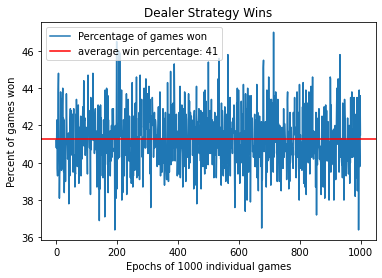

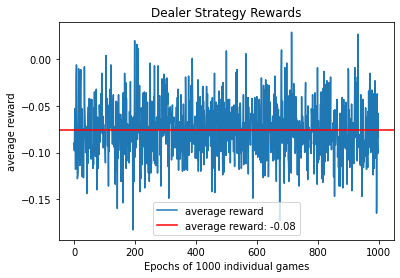

In [2]:
epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(mimic_dealer, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Dealer Strategy Wins")
plt.legend()
plt.show()
fig.savefig('./images/baseline_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Dealer Strategy Rewards")
plt.legend()
plt.show()
fig.savefig('./images/baseline_rewards.png')

# MONTE CARLO prediction

### MC prediction evaluating basic strategy

100%|██████████| 500000/500000 [00:05<00:00, 89640.90it/s]


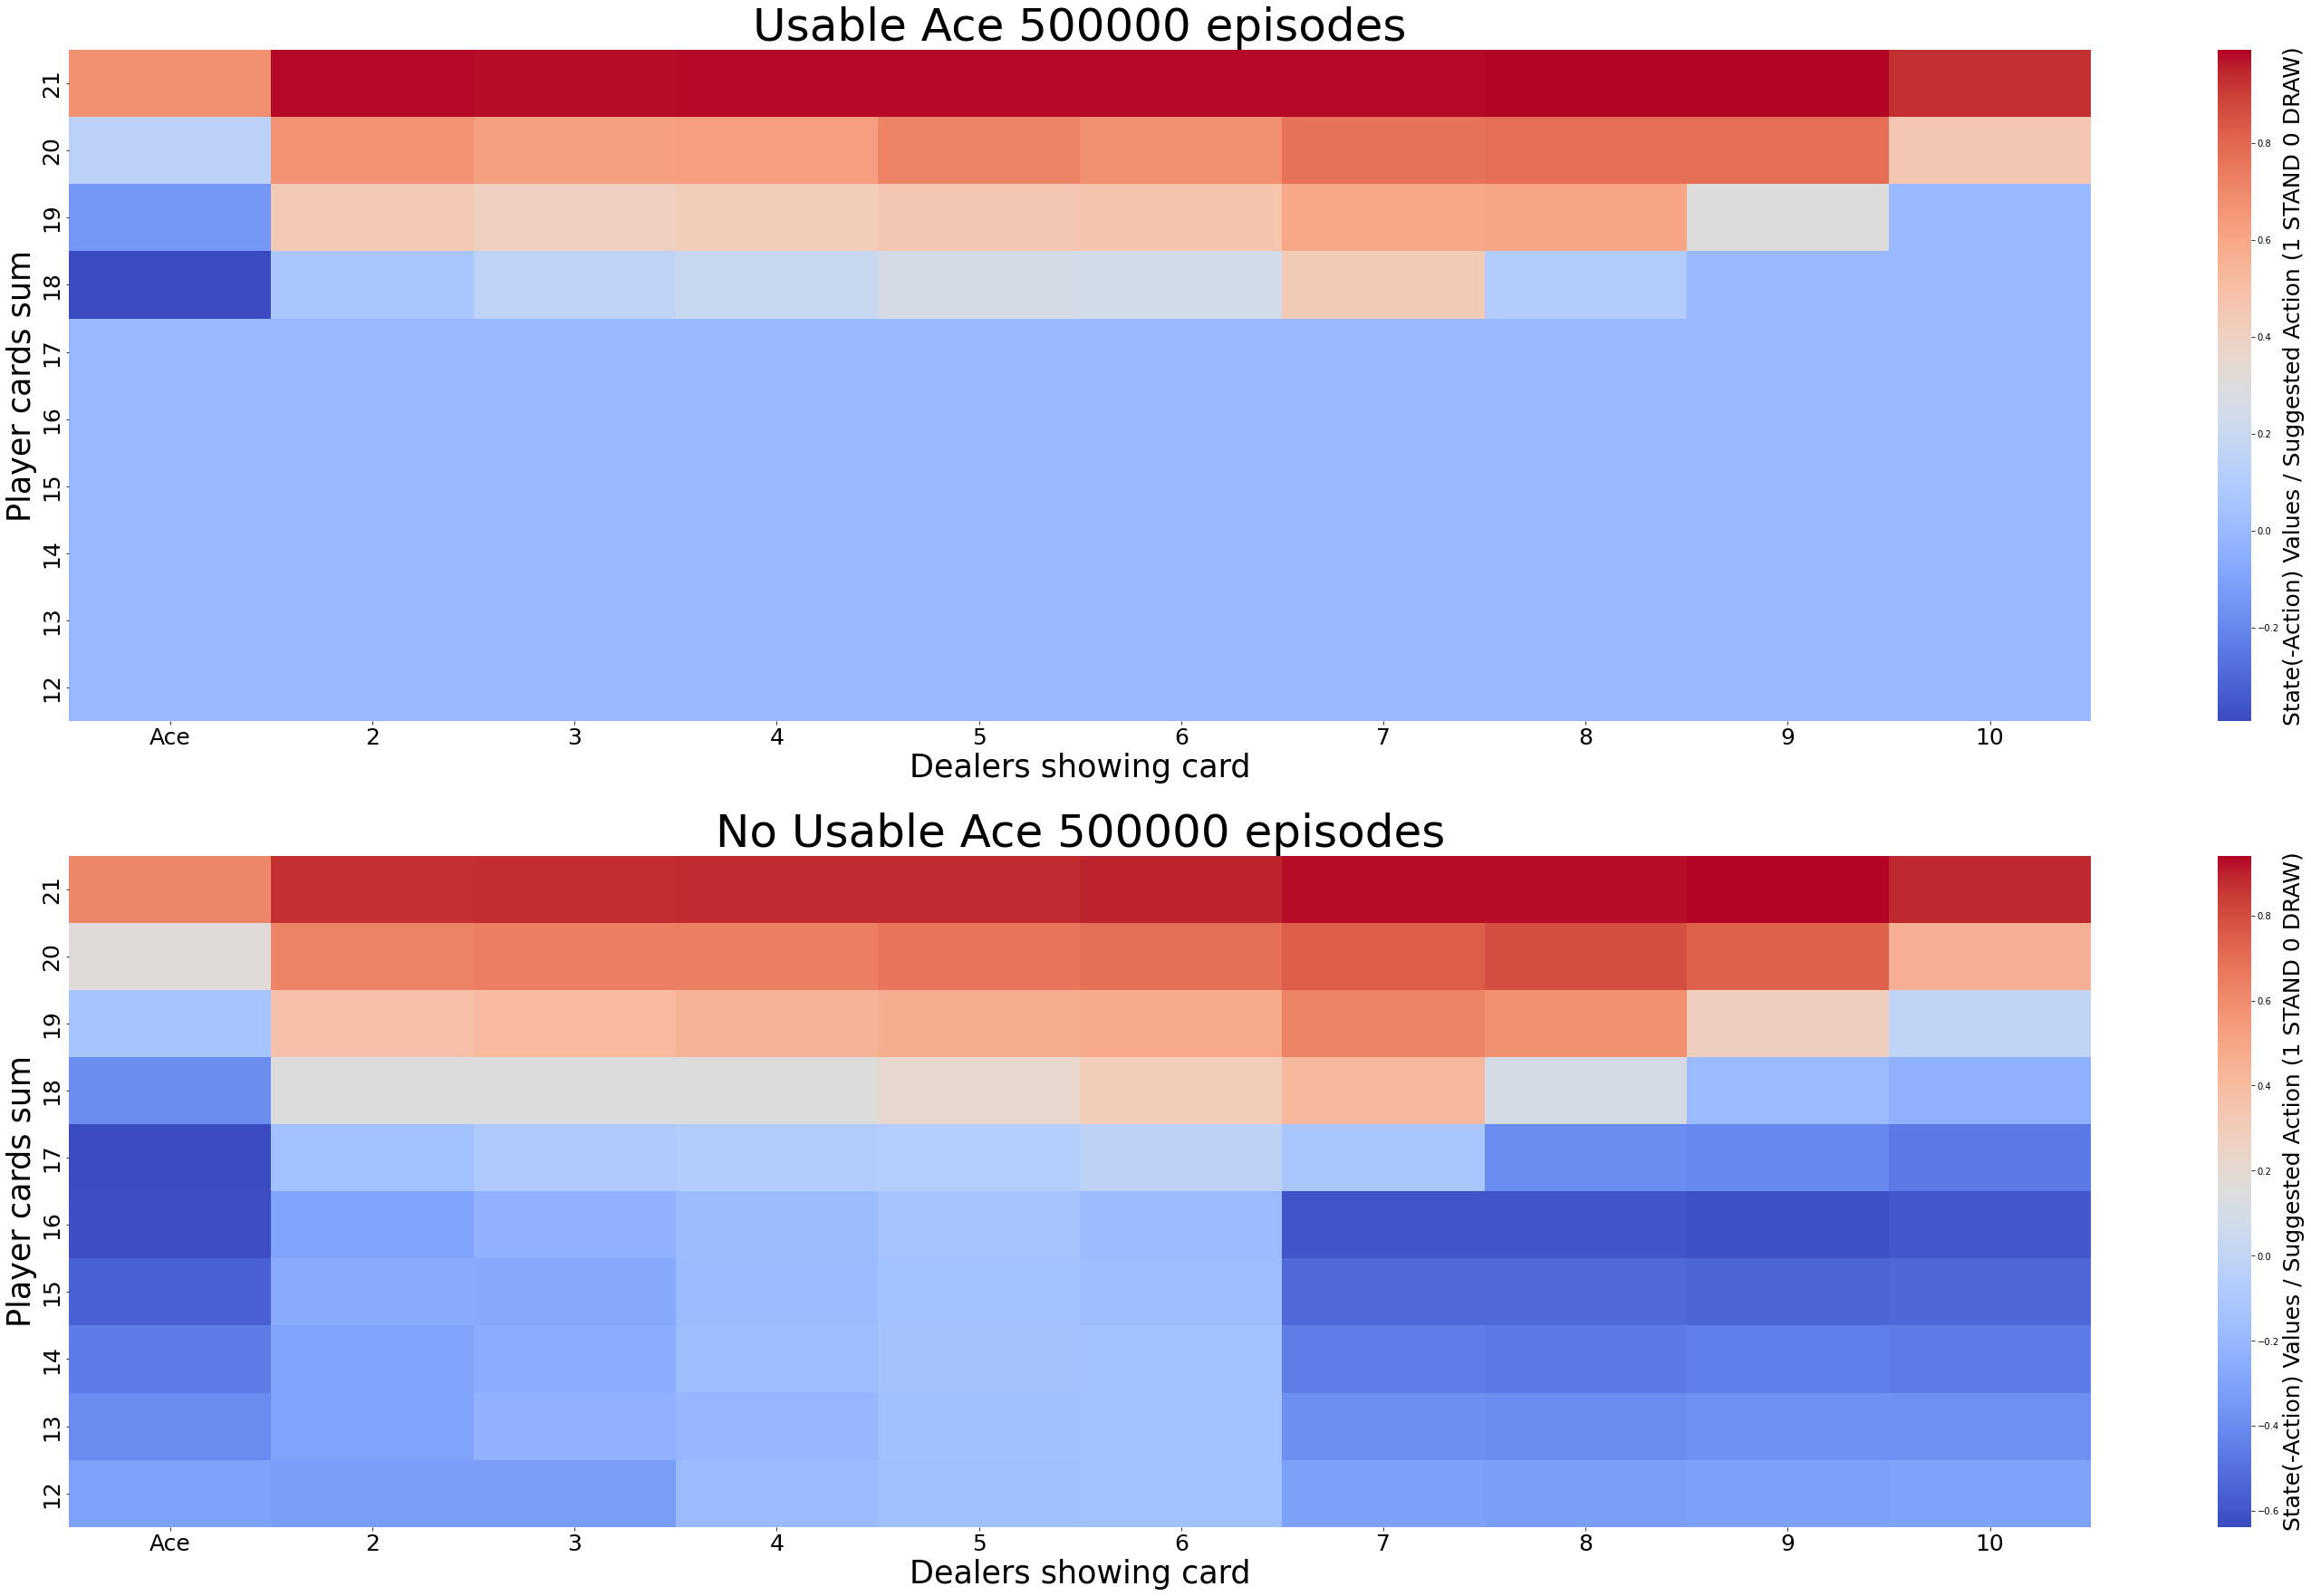

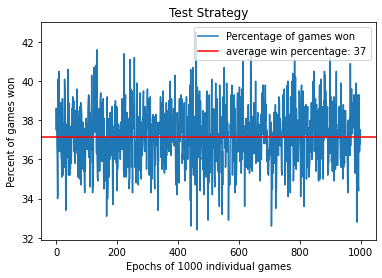

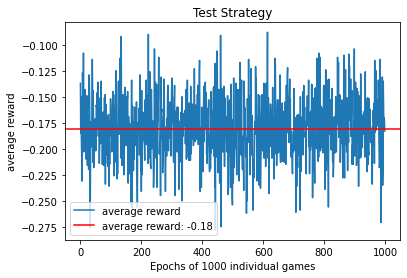

In [3]:
state_ace, state_no_ace, ace, no_ace = run(MC_prediction, 500000, basic_strategy, 0, "basic strategy after MC prediction")

strat = policy_for_MC(ace, no_ace)
policy = strat.decide_action


epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(policy, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/BS_MC_prediction_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/BS_MC_prediction_rewards.png')

### Check Basic Strategy for playing

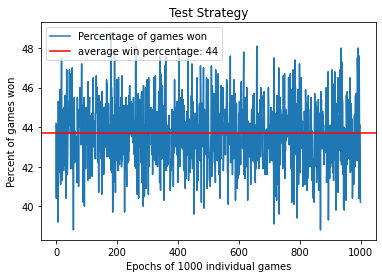

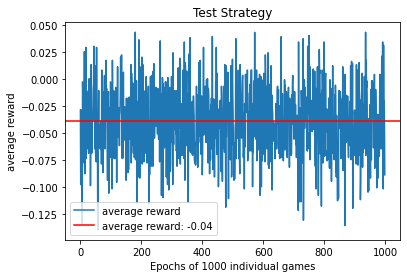

In [10]:
epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(basic_strategy, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/basic_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/basic_rewards.png')

### MC prediction evaluating Complete Point Count Strategy

100%|██████████| 500000/500000 [00:07<00:00, 63821.81it/s]


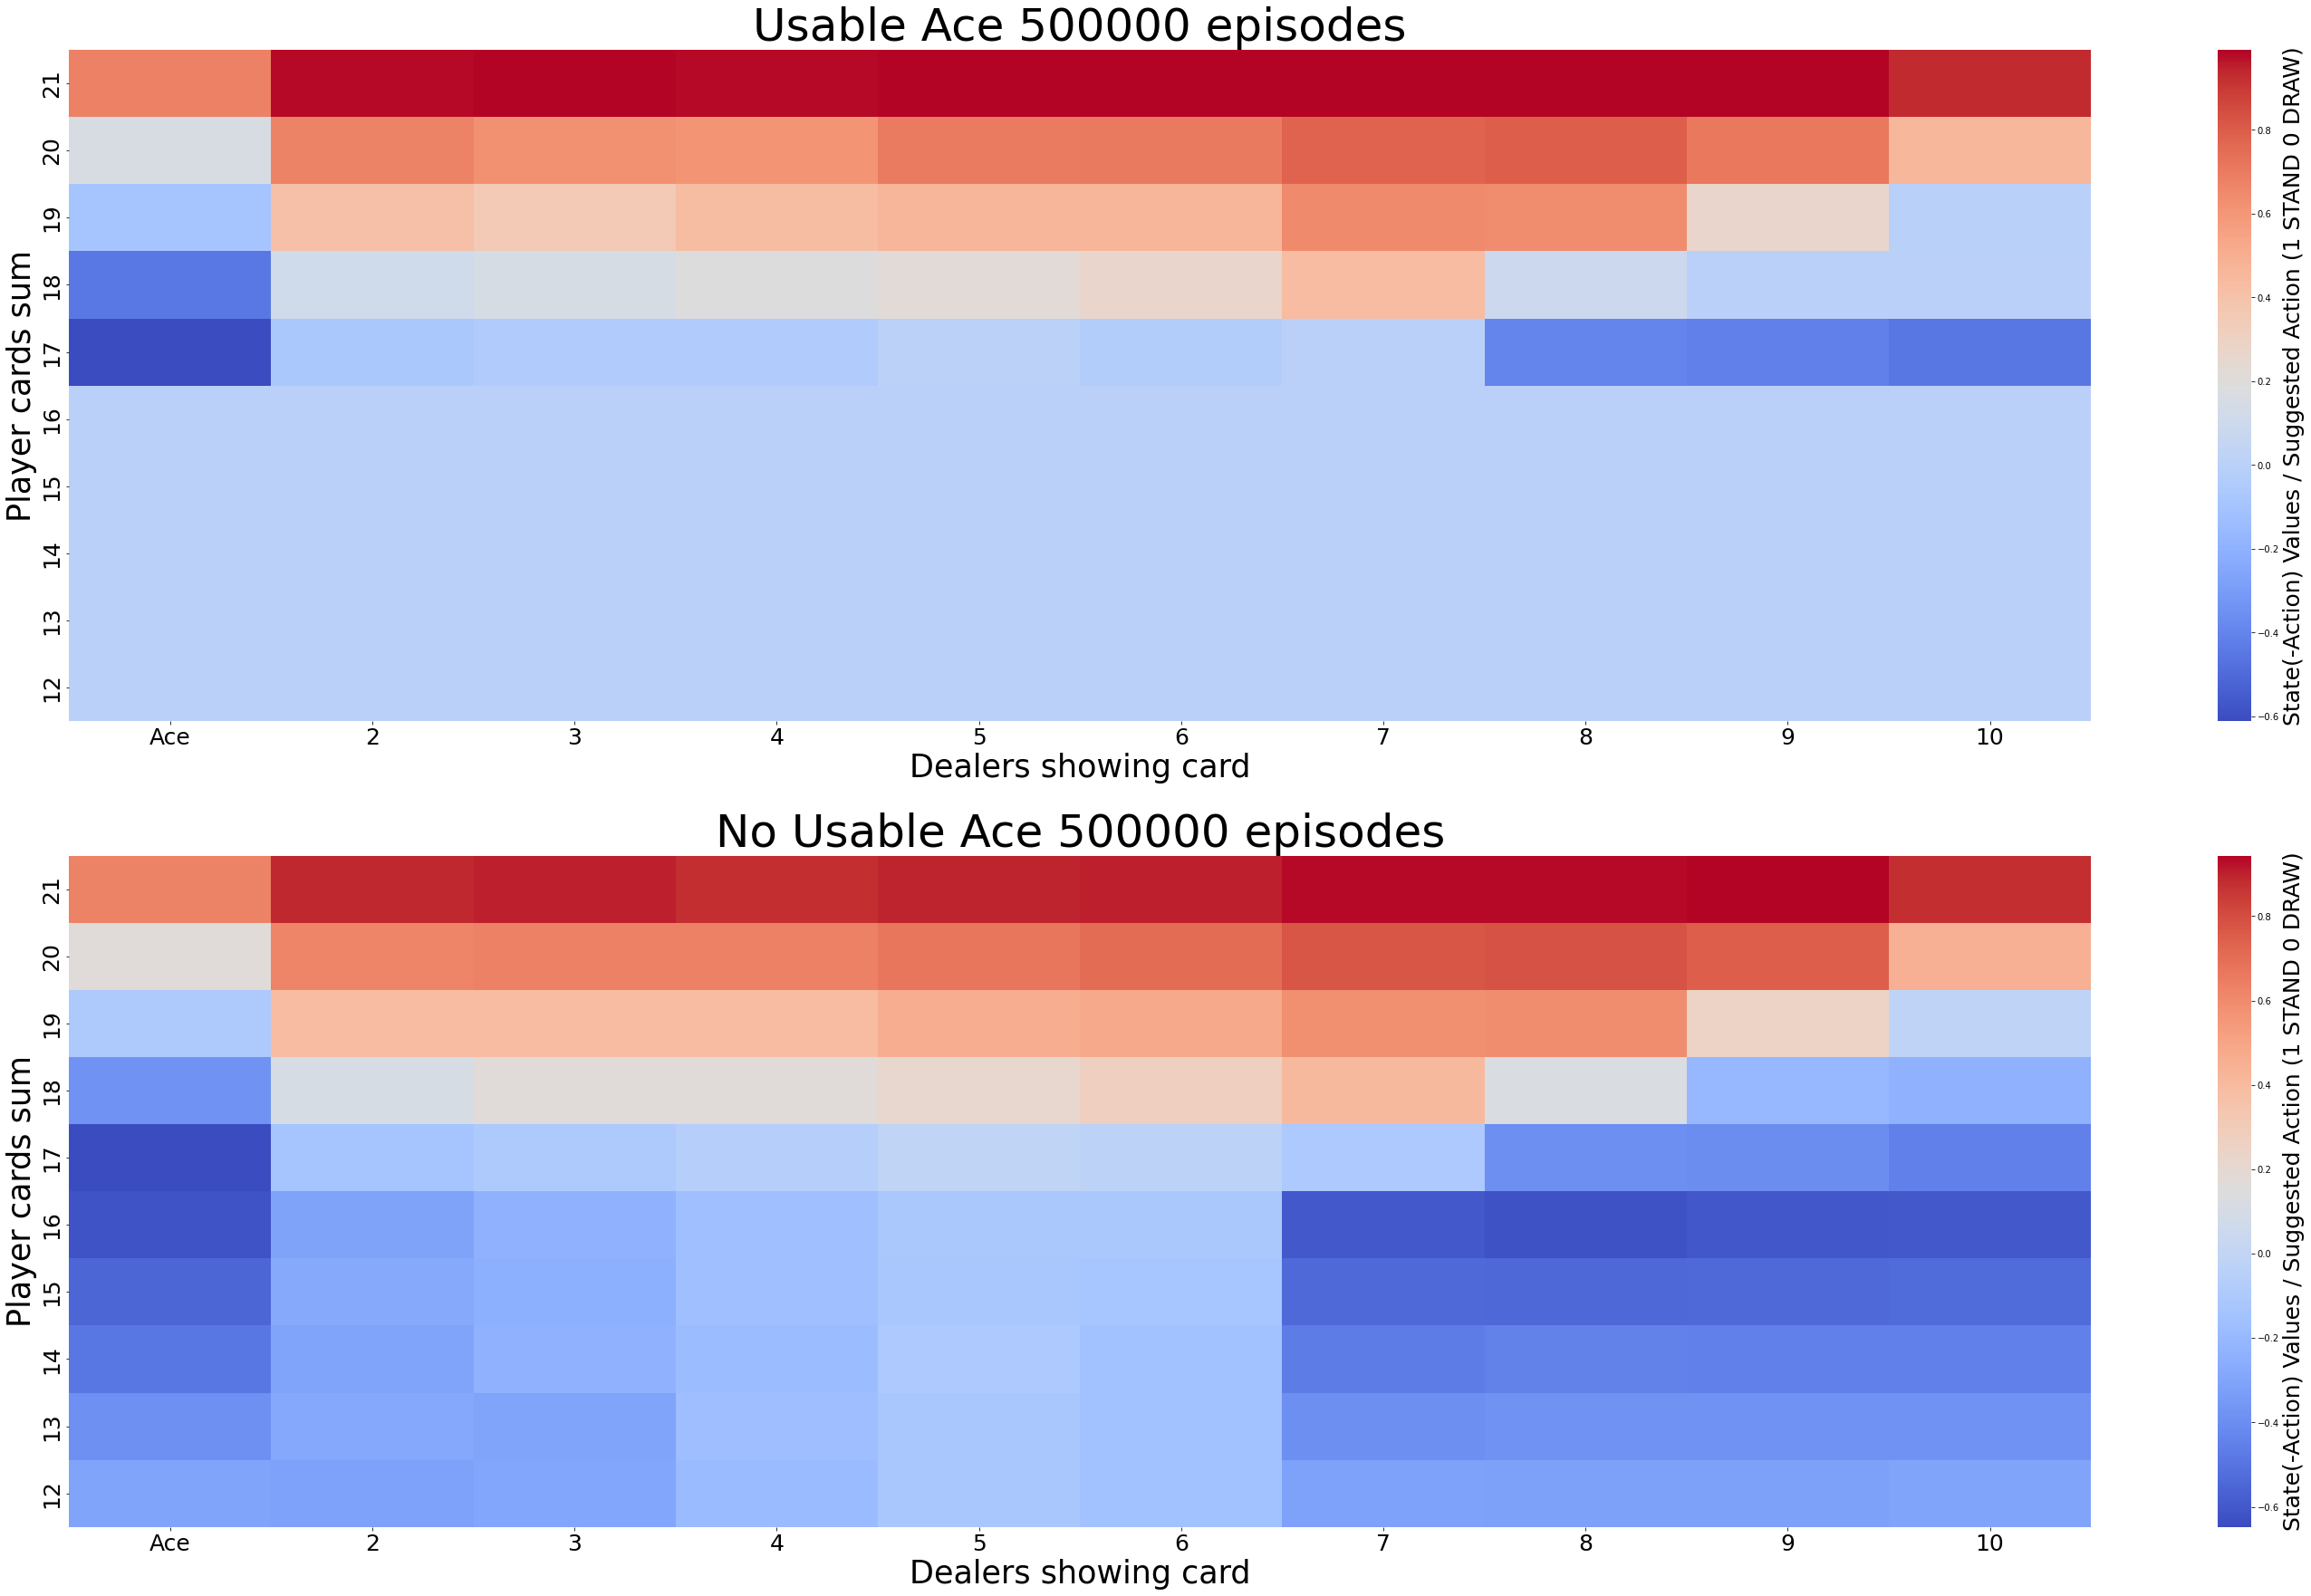

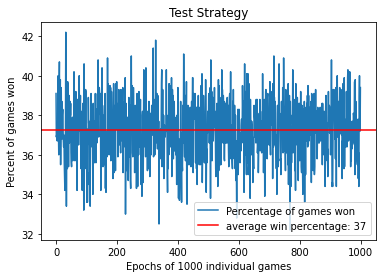

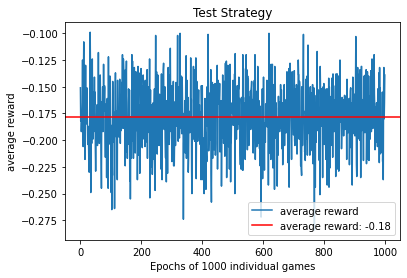

In [4]:
state_ace, state_no_ace, ace, no_ace = run(MC_prediction, 500000, complete_count_strategy, 0,
                  "Comlete Point Count System - MC prediction",
                  count_cards=True, count_method="complete")

strat = policy_for_MC(ace, no_ace)
policy = strat.decide_action


epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(policy, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/CPCS_MC_prediction_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/CPCS_MC_prediction_rewards.png')

### Check complete point-count system for playing

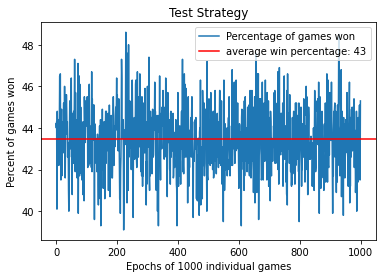

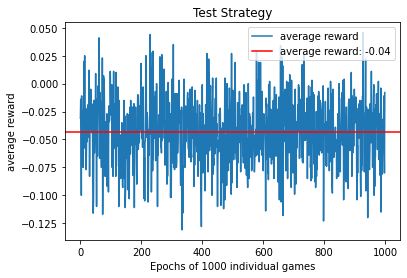

In [5]:
epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(complete_count_strategy, play_episodes,
                                        count_cards=True, count_method="complete")
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/CPCS_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/CPCS_rewards.png')

### MC prediction with Simple point-count system

100%|██████████| 500000/500000 [00:07<00:00, 69736.29it/s]


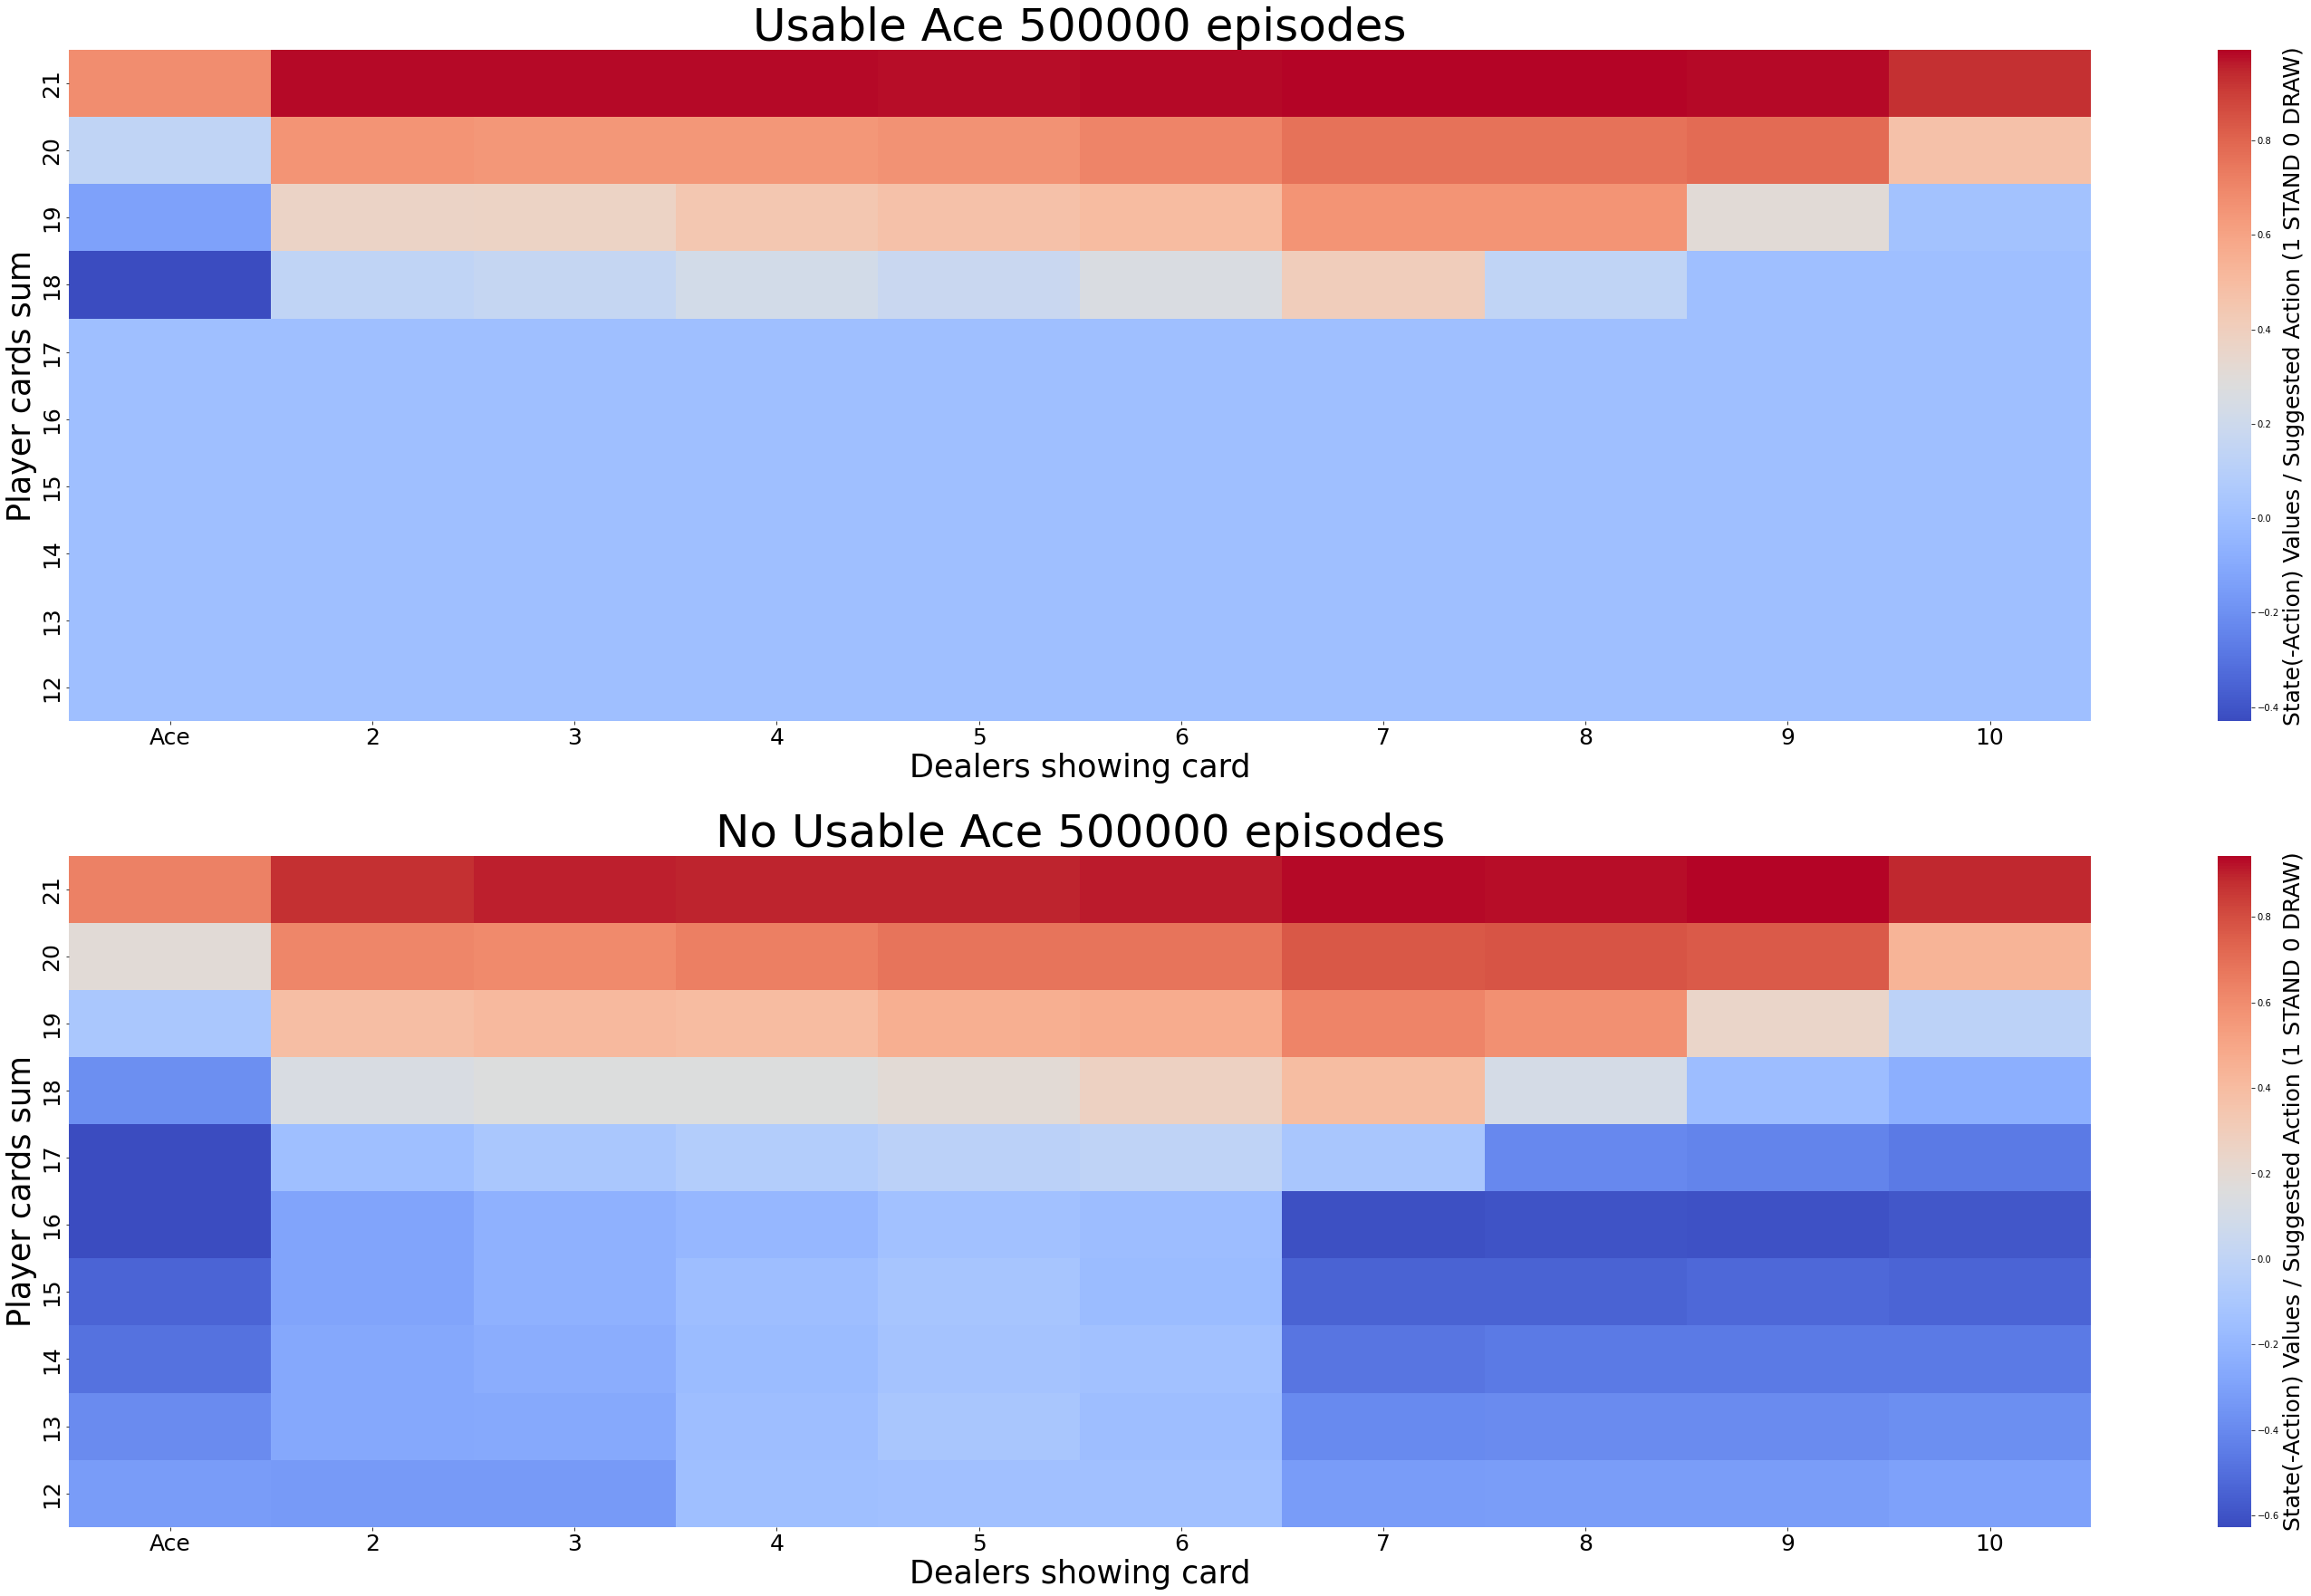

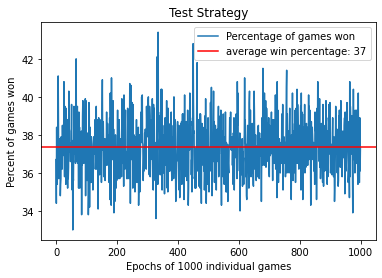

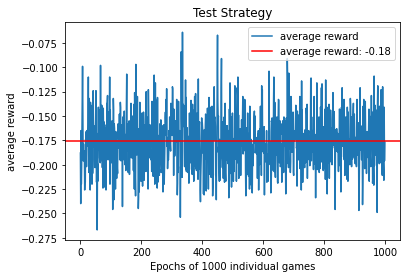

In [6]:
state_ace, state_no_ace, ace, no_ace = run(MC_prediction, 500000, basic_strategy, 0,
                  "Simple Point Count System - MC prediction",
                  count_cards=True, count_method="simple")

strat = policy_for_MC(ace, no_ace)
policy = strat.decide_action


epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(policy, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_MC_prediction_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_MC_prediction_rewards.png')

### Check Simple Point-Count System

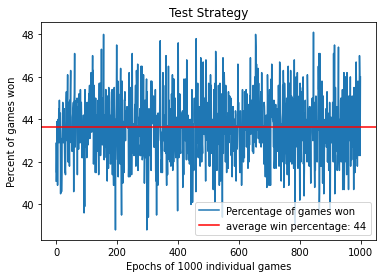

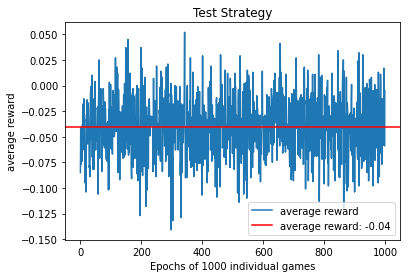

In [7]:
epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(basic_strategy, play_episodes,
                                        count_cards=True, count_method="simple")
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_rewards.png')

# MONTE CARLO EXPLORING STARTS

100%|██████████| 500000/500000 [00:07<00:00, 62784.92it/s]


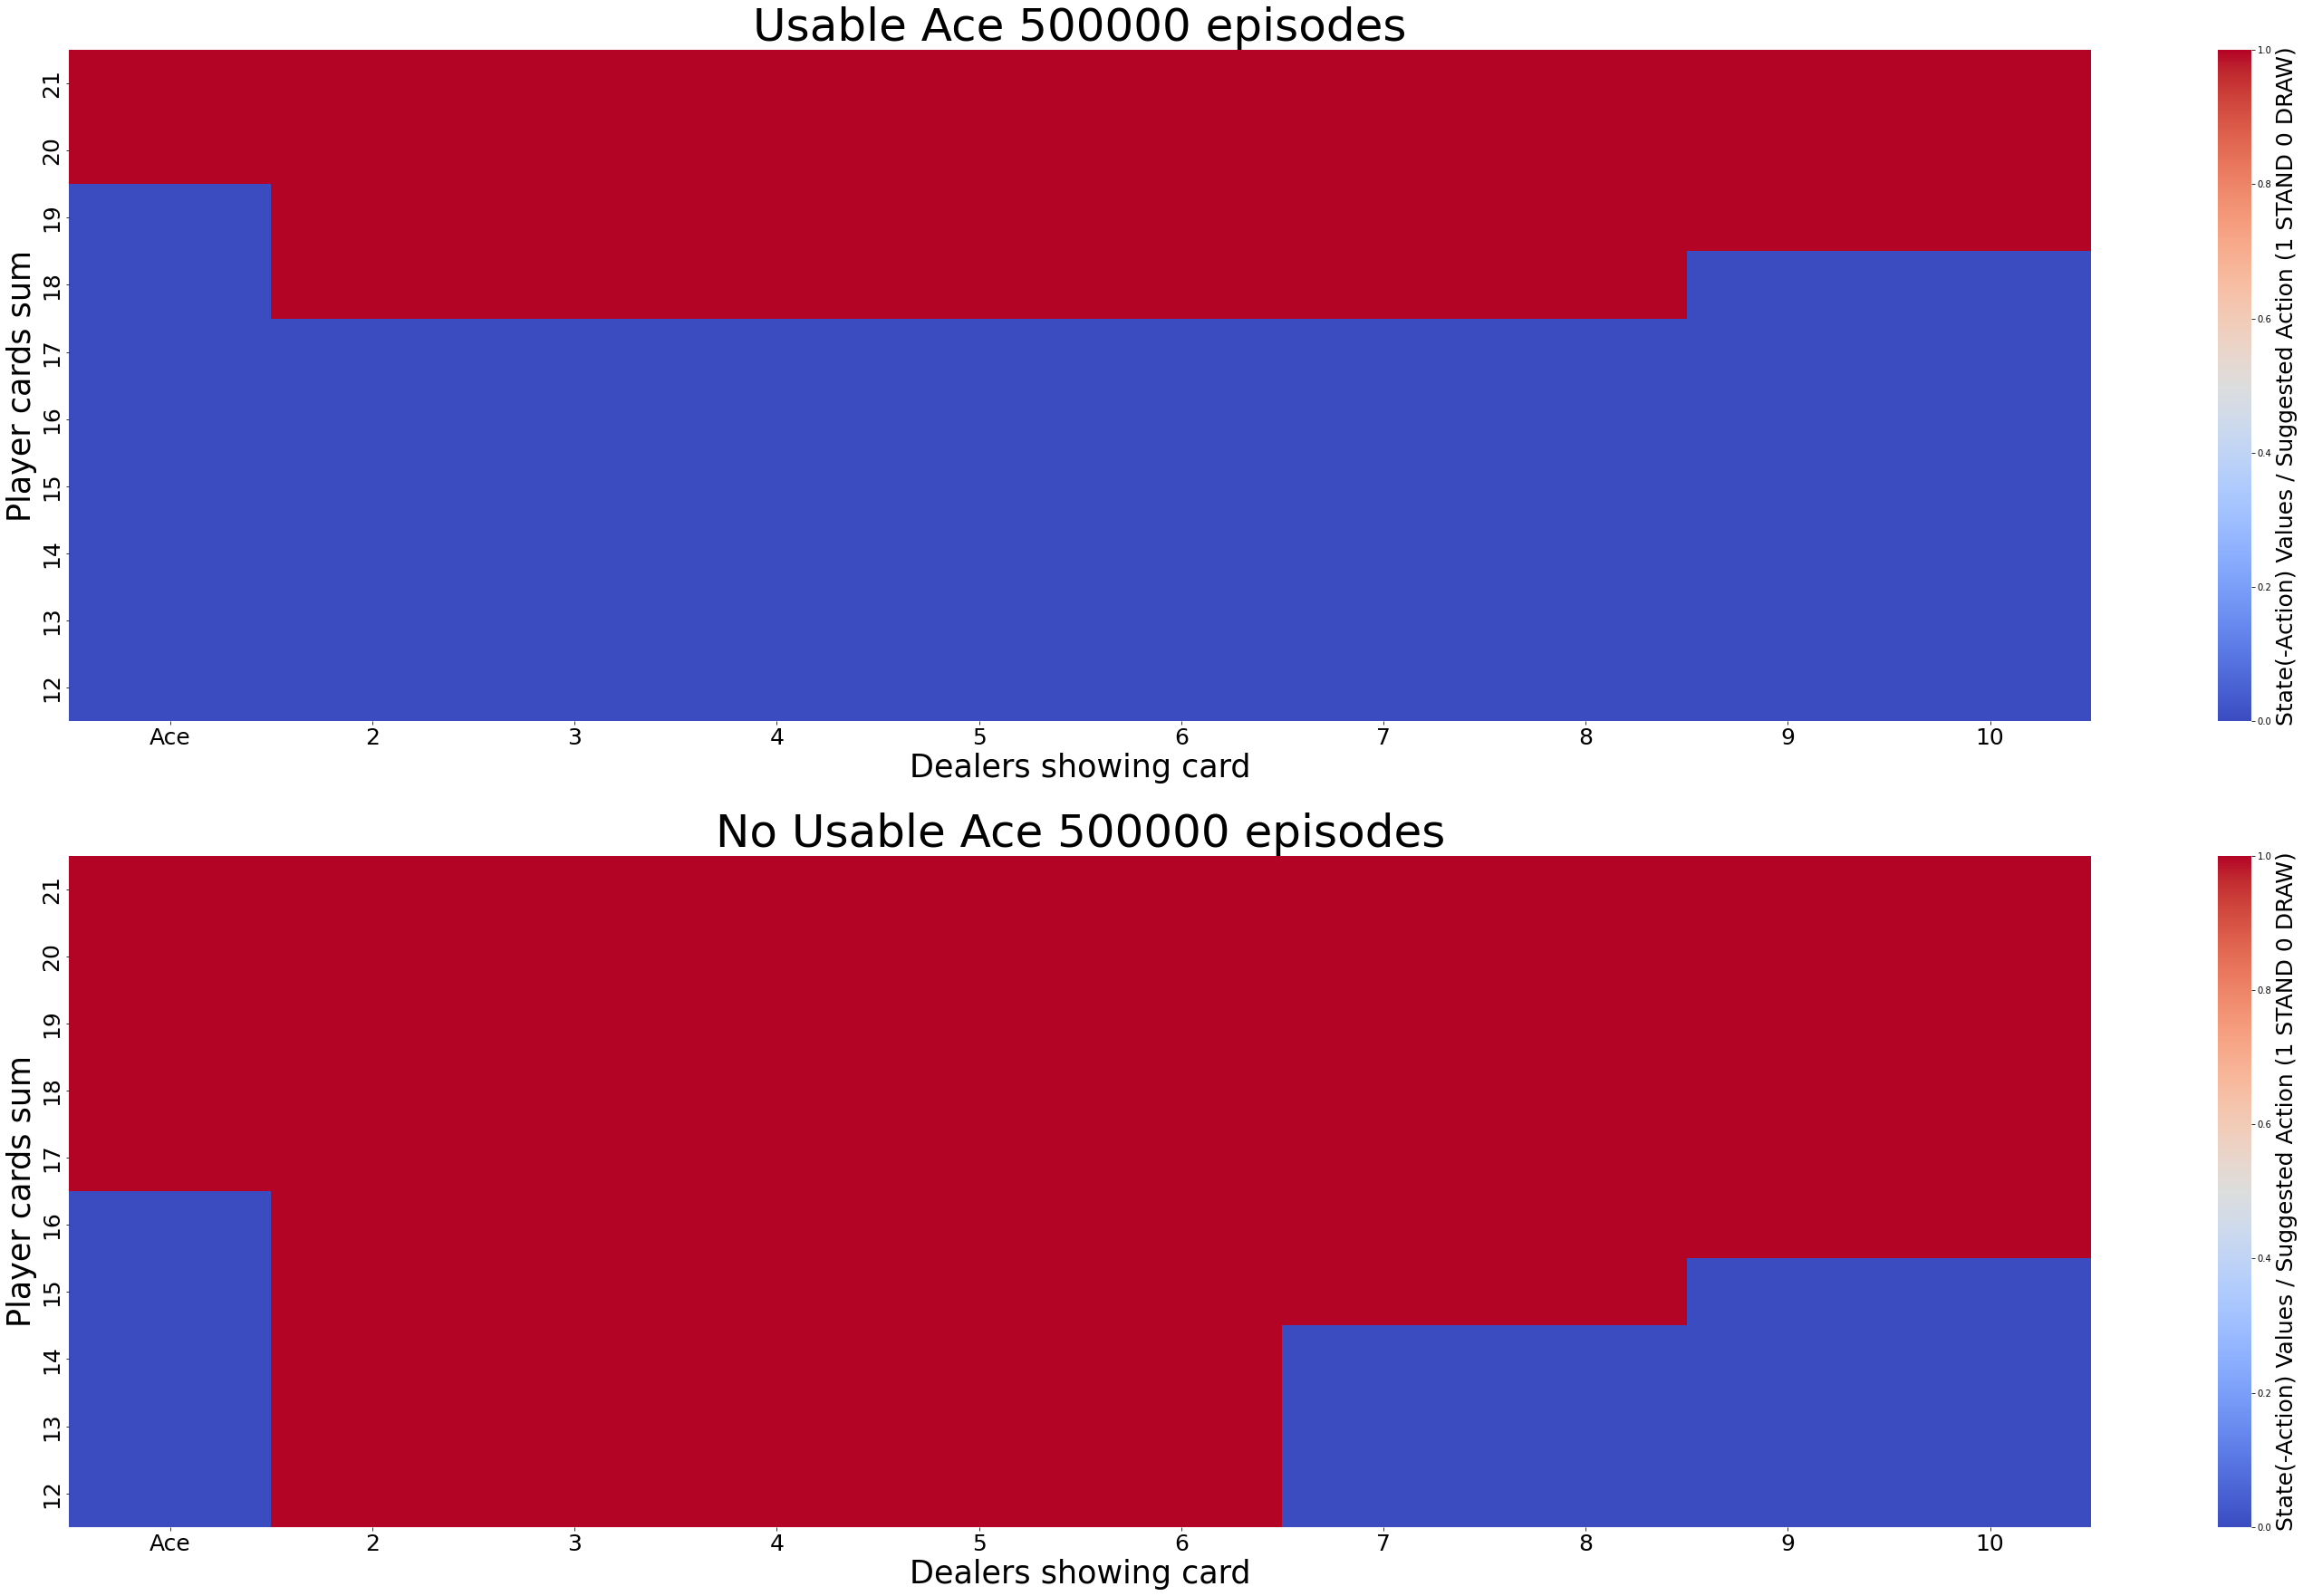

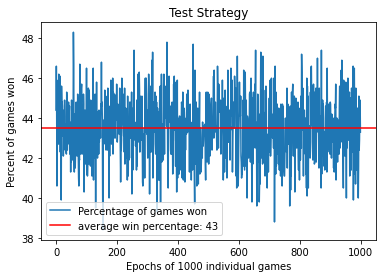

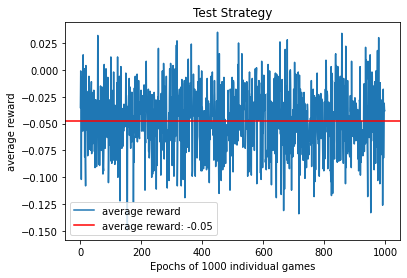

In [8]:
state_ace, state_no_ace, ace, no_ace = run(MC_ES, 500000, random_action, 0,
                  "MC Exploring Starts")

strat = policy_for_MC(ace, no_ace)
policy = strat.decide_action

epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(policy, play_episodes)
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/MC_ES_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/MC_ES_rewards.png')

100%|██████████| 500000/500000 [00:09<00:00, 53223.62it/s]


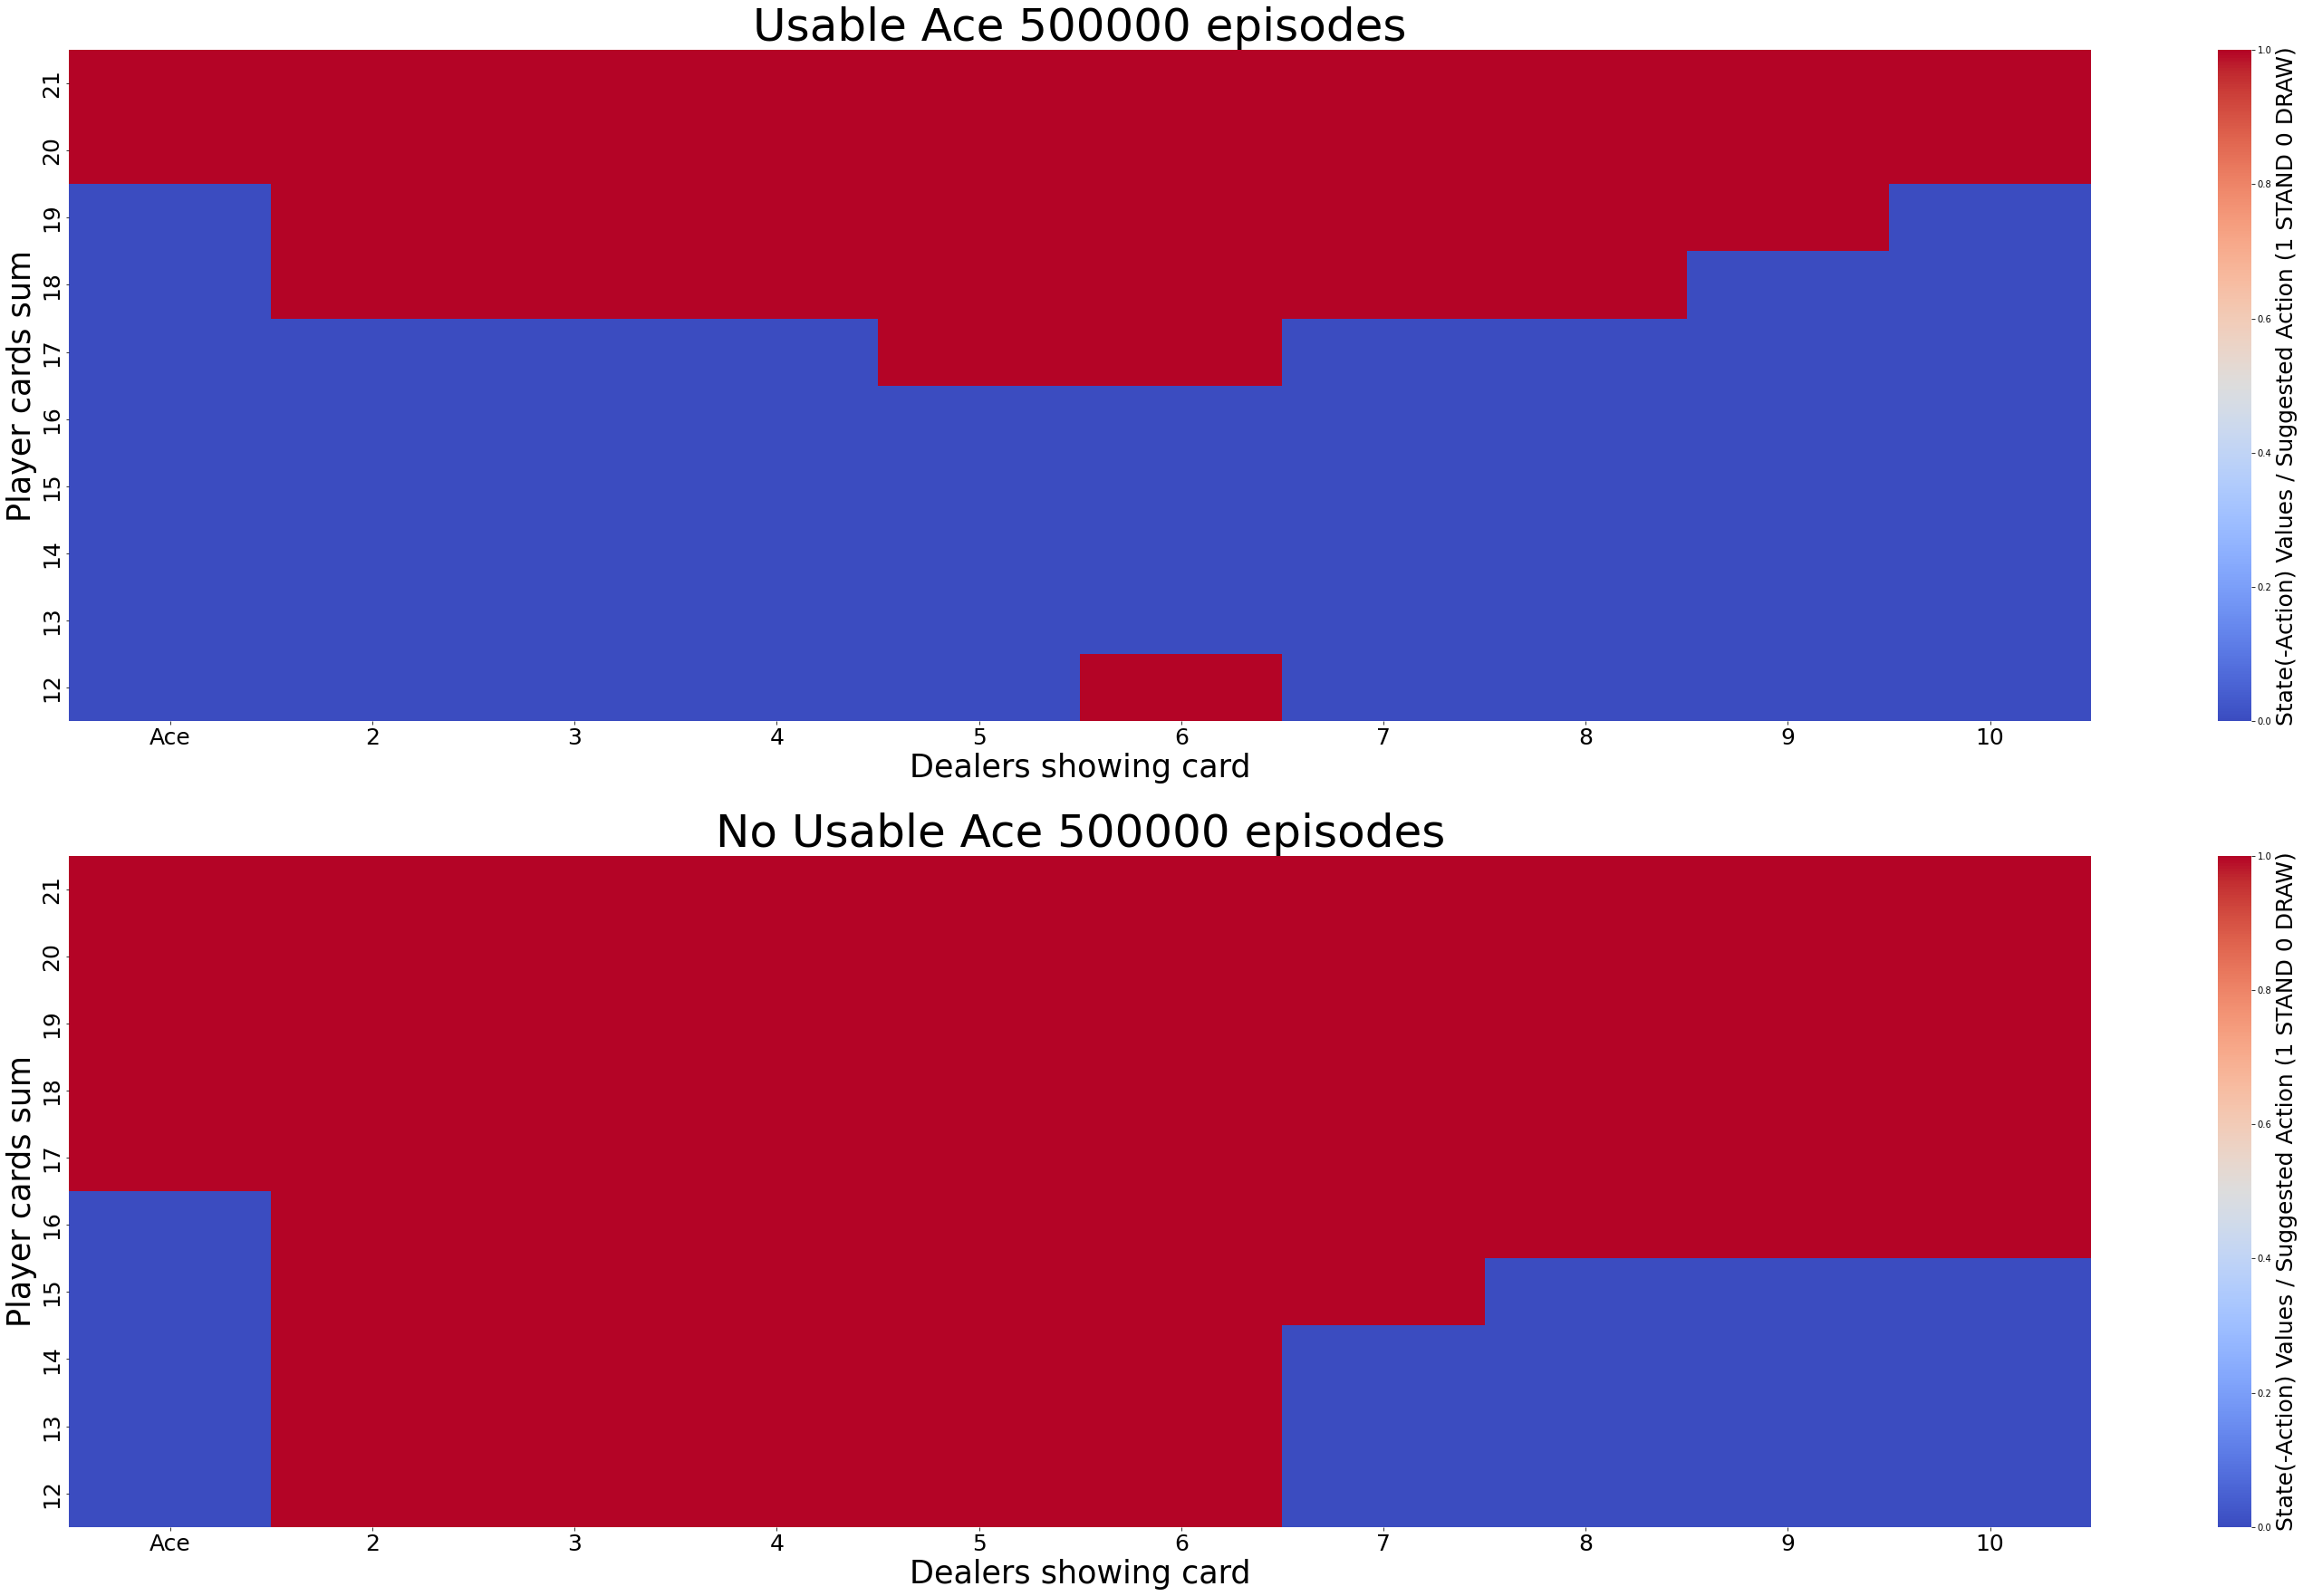

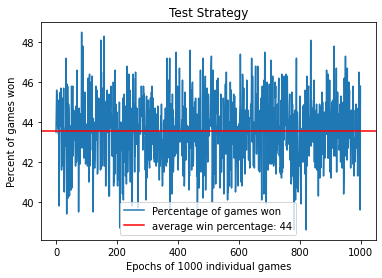

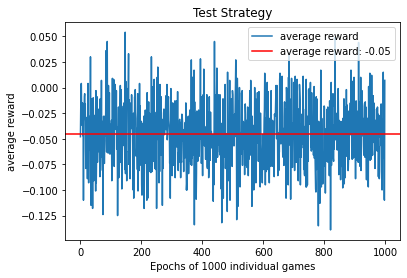

In [9]:
state_ace, state_no_ace, ace, no_ace = run(MC_ES, 500000, random_action, 0,
                  "MC Exploring Starts", count_cards=True, count_method="simple")


strat = policy_for_MC(ace, no_ace)
policy = strat.decide_action

epochs = 1000
play_episodes = 1000
avg_wins = []
avg_rewards = []
for _ in range(epochs):
    wins, rewards = play_with_policy(policy, play_episodes, count_cards=True, count_method="simple")
    avg_wins.append(wins)
    avg_rewards.append(rewards)

fig = plt.figure()
plt.plot(avg_wins, label="Percentage of games won")
plt.axhline(sum(avg_wins) / epochs, color="red",
            label="average win percentage: " + str(round(sum(avg_wins) / epochs)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("Percent of games won")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_MC_ES_wins.png')

fig = plt.figure()
plt.plot(avg_rewards, label="average reward")
plt.axhline(sum(avg_rewards) / epochs, color="red",
            label="average reward: " + str(round(sum(avg_rewards) / epochs, 2)))
plt.xlabel("Epochs of " + str(play_episodes) + " individual games")
plt.ylabel("average reward")
plt.title("Test Strategy")
plt.legend()
plt.show()
fig.savefig('./images/SPCS_MC_ES_rewards.png')